# Import and installas needed

In [ ]:
!pip install imageio==2.34.0
!pip install cvat_sdk
!pip install "cvat-sdk[pytorch]"
!pip install albumentations
# !pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --index-url https://download.pytorch.org/whl/cu117

In [ ]:
import cvat_sdk

In [ ]:
import PIL
print('pillow version: ', PIL.__version__)


pillow version:  10.2.0


In [ ]:
from torchvision import transforms
def get_red_channel(image: PIL.Image.Image) -> PIL.Image.Image:
    return image[:,:,0] #return just the red channel

In [ ]:
import albumentations as A
import torch
#from torchvision.transforms import transforms

# train : bool

# only relevant is train = true:
#   rotation : [min,max] upper lower limits of rotation
def get_transform_large_image(train, rotation = [-7,7], rotation_prob=0.5):

  transforms = []

  # the onlnie system only uses the center of the image.


  if train:
    #transforms.append( A.augmentations.geometric.rotate.SafeRotate (limit=rotation, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=rotation_prob) )
    # mayube use center crop?
    transforms.append(A.HorizontalFlip(p=0.5))
    transforms.append(A.VerticalFlip(p=0.5))

    # this one is more dstructive, we will start without using it.
    # transforms.append(A.OneOf([
    #     A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    #     A.GridDistortion(p=0.5),
    #     A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
    # ], p=0.8)])
  transforms.append(A.augmentations.crops.transforms.Crop(0,190,2464,690))

  # transforms.append(v2.Lambda(get_red_channel))

  transform = A.Compose(
    transforms,
    bbox_params=A.BboxParams(format="pascal_voc", label_fields=['class_labels']),
  )

  return transform


tf_test = get_transform_large_image(train=True)

In [ ]:
# import torchvision
# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


# def get_instance_segmentation_model(num_classes):
#     # load an instance segmentation model pre-trained on COCO
#     model = torchvision.models.detection.maskrcnn_resnet50_fpn(
#         pretrained=True,
#         box_detections_per_image=1000,
#         box_batch_size_per_image=5120,
#         rpn_pre_nms_top_n_train=20000,
#         rpn_pre_nms_top_n_test=10000,
#         rpn_post_nms_top_n_train=20000,
#         rpn_post_nms_top_n_test=10000,
#         rpn_nms_thresh=0.7,
#         rpn_fg_iou_thresh=0.7,
#         rpn_bg_iou_thresh=0.3,
#         rpn_batch_size_per_image=2560,
#         min_size=125,
#         max_size=616,
#     )

#     # get the number of input features for the classifier
#     in_features = model.roi_heads.box_predictor.cls_score.in_features
#     # replace the pre-trained head with a new one
#     model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

#     # now get the number of input features for the mask classifier
#     in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
#     hidden_layer = 256
#     # and replace the mask predictor with a new one
#     model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
#                                                        hidden_layer,
#                                                        num_classes)

#     return model

In [ ]:
cvat_dataset = None

Createa a dataset by pulling data from cvat

In [ ]:
from cvat_sdk import make_client
from cvat_sdk.pytorch import TaskVisionDataset, ExtractSingleLabelIndex
import getpass

# get the password for CVAT
# password = getpass.getpass()

with make_client(host="app.cvat.ai", credentials=('whavener', 'LabelDoo1')) as client:
  cvat_dataset = TaskVisionDataset(client, task_id=447682,
        # use transforms that fit our neural network
        # transform=torchvision.models.ResNet34_Weights.IMAGENET1K_V1.transforms(),
        # transform=get_transform(train=True )
        )


In [ ]:
im, target = cvat_dataset[5]
im

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
type(cvat_dataset)


cvat_sdk.pytorch.task_dataset.TaskVisionDataset

In [ ]:
dummy_points = [26.0,
          7.0,
          45.0,
          16.0,
          42.0,
          17.0,
          40.0,
          24.0,
          32.0,
          30.0,
          28.0,
          33.0,
          25.0,
          35.0,
          23.0,
          38.0,
          21.0,
          40.0,
          18.0,
          45.0,
          14.0,
          46.0,
          11.0,
          49.0,
          9.0,
          51.0,
          7.0,
          52.0,
          6.0,
          53.0,
          6.0,
          53.0,
          6.0,
          53.0,
          5.0,
          54.0,
          4.0,
          55.0,
          4.0,
          55.0,
          4.0,
          55.0,
          3.0,
          56.0,
          2.0,
          57.0,
          2.0,
          57.0,
          2.0,
          57.0,
          2.0,
          58.0,
          1.0,
          118.0,
          1.0,
          58.0,
          2.0,
          57.0,
          2.0,
          57.0,
          2.0,
          57.0,
          3.0,
          55.0,
          5.0,
          53.0,
          6.0,
          52.0,
          8.0,
          50.0,
          9.0,
          50.0,
          10.0,
          48.0,
          12.0,
          47.0,
          12.0,
          47.0,
          13.0,
          45.0,
          14.0,
          45.0,
          15.0,
          42.0,
          18.0,
          41.0,
          18.0,
          41.0,
          19.0,
          39.0,
          21.0,
          38.0,
          22.0,
          36.0,
          25.0,
          34.0,
          25.0,
          33.0,
          27.0,
          31.0,
          29.0,
          30.0,
          30.0,
          27.0,
          34.0,
          24.0,
          37.0,
          21.0,
          39.0,
          18.0,
          51.0,
          7.0,
          19.0,
          1012.0,
          590.0,
          1070.0,
          646.0]

In [ ]:
import numpy as np

def rle2MaskCvat(rle: list[int], width: int, height:int)->np.ndarray:

    rle_int = [int(i) for i in rle]

    x1 = rle_int[-4]
    x2 = rle_int[-2]
    y1 = rle_int[-3]
    y2 = rle_int[-1]

    mask_width = x2 -x1 + 1
    mask_height = y2 - y1 + 1

    rle_mask = rle_int[:-5]

    decoded = [0] * (mask_width * mask_height) # create bitmap container
    decoded_idx = 0
    value = 0



    for v in rle_mask:
        decoded[decoded_idx:decoded_idx+v] = [value] * v
        decoded_idx += v
        value = abs(value - 1)

    decoded = np.array(decoded, dtype=np.uint8)
    decoded = decoded.reshape((mask_height, mask_width)) # reshape to image size

    whole_mask = np.zeros(( height, width))
    #print(height, width)
    #print(mask_height, mask_width)
    whole_mask[y1:y2+1,x1:x2+1] =  decoded

    #whole_mask = np.expand_dims(whole_mask, axis=2)

    # mask = {
    #     'data' : decoded,
    #     'mask_height' : mask_height,
    #     'mask_width' : mask_width,
    #     'x1' : x1,
    #     'x2' : x2+1,
    #     'y1' : y1,
    #     'y2' : y2+1,
    #     'image_height' : height,
    #     'image_width' : width,
    # }

    return whole_mask

# test the function

def get_big_mask (mask):
    whole_mask = np.zeros(( mask['image_height'], mask['image_width']))
    #print(height, width)
    #print(mask_height, mask_width)
    whole_mask[mask['y1']:mask['y2'],mask['x1']:mask['x2']] =  mask['data']

    return whole_mask


mask_data = rle2MaskCvat(dummy_points, 2464, 876)

# mask = get_big_mask(mask_data)


In [ ]:
# resnet50 expects [x1, y1, x2, y2] format

def rle2Bbox(rle: list[int])->np.ndarray:

    rle_int = [int(i) for i in rle]

    x1 = rle_int[-4]
    x2 = rle_int[-2]
    y1 = rle_int[-3]
    y2 = rle_int[-1]

    return np.array([x1, y1, x2, y2])


bbox = rle2Bbox(dummy_points)
bbox


array([1012,  590, 1070,  646])

In [ ]:
import numpy as np

def rle2Area(rle: list[int])-> int:

    rle_int = [int(i) for i in rle]

    x1 = rle_int[-4]
    x2 = rle_int[-2]
    y1 = rle_int[-3]
    y2 = rle_int[-1]

    mask_width = x2 -x1 + 1
    mask_height = y2 - y1 + 1

    rle_mask = rle_int[:-5]

    # decoded = [0] * (mask_width * mask_height) # create bitmap container
    # decoded_idx = 0
    value = 0


    area = 0
    for v in rle_mask:
        # decoded[decoded_idx:decoded_idx+v] = [value] * v
        # decoded_idx += v
        if (value == 1):
          area = area + value
        value = abs(value - 1)

    return area

# test the function



vals = rle2Area(dummy_points)
print(vals)

56


In [ ]:
def get_valid(bboxes):
  index = 0
  valid = []
  for bbox in bboxes:
    if bbox[1] <= 670 and bbox[3] >= 210:
      valid.append(index)
    index = index + 1
  return valid


In [ ]:

DEFAULT_IMAGE_SHAPE = (500,2464)

# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def mask2rle(img):
    """
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formatted
    """
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)


def rle2mask(mask_rle: str, label=1, shape=DEFAULT_IMAGE_SHAPE):
    """
    mask_rle: run-length as string formatted (start length)
    shape: (height,width) of array to return
    Returns numpy array, 1 - mask, 0 - background

    """
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = label
    return img.reshape(shape)  # Needed to align to RLE direction

In [ ]:
data = []

tf = get_transform_large_image(train=False)

def get_anno(img, target, index):
  t_masks = np.array([rle2MaskCvat(i['points'], img.width, img.height) for i in target.annotations.shapes])
  #t_masks = [get_big_mask(i) for i in t_masks_data]
  t_boxes = np.array([rle2Bbox(i['points']) for i in target.annotations.shapes])
  t_area = np.array([rle2Area(i['points']) for i in target.annotations.shapes])
  t_labels = torch.ones(len(t_boxes))




  valid = get_valid(t_boxes)
  print(valid)

  t_masks = np.array(t_masks[valid])
  t_boxes = np.array(t_boxes[valid])
  t_area = np.array(t_area[valid])
  t_labels = np.array(t_labels[valid])

  img = np.asarray(img)
  transformed = tf(image=img, masks=t_masks, bboxes=t_boxes, class_labels=t_labels)



  anno = {
      'image' : transformed['image'][:, :, 0],
      'bboxes' : transformed['bboxes'],
      'masks' : [mask2rle(i) for i in transformed['masks']],
      'class_labels' : transformed['class_labels'],
      'areas' : t_area
  }

  if( not ( len(anno['bboxes']) == len(anno['masks']) and len(anno['bboxes']) == len(anno['class_labels']) and len(anno['bboxes']) == len(anno['areas']))):
      print("anno lengths mismatch", index)

  return anno

index = 0
for img, target in cvat_dataset:
  a = get_anno(img, target, index)
  data.append(a)
  index = index +1



[1, 3, 5]
[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 13, 17]
[1, 3, 4, 5, 6, 11, 13]
[1, 2, 3, 6, 9, 10, 11, 12]
[0, 1]
[1, 3, 4, 5, 6, 8, 9]
[0, 1, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 21, 22, 23, 24]
[1, 2, 3, 11, 14, 15, 16, 17, 18, 19, 21, 22]
[0, 1, 2, 3, 4]
[3, 4, 6, 7, 8, 9, 10, 13, 16, 17]
[0, 3, 4, 6, 7, 8, 9, 11, 12, 14, 15]
[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23]
[0, 1, 2, 4, 6, 11, 12]
[0, 1, 2, 3, 4, 5, 7, 8, 9]
[0, 1, 2, 4, 6]
[2]
[0, 1, 2, 4]
[2, 3, 4, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 5]
[0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 17, 18, 19, 23, 26, 27, 28, 29, 30, 31]
[4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 41, 43]
[1, 8, 9, 10, 12, 14, 15]
[1, 6]
[0, 1, 2, 5, 8, 9, 10, 11, 13, 14, 16, 17, 18]
[0, 1, 2, 4, 5, 6, 7, 8, 10, 11]
[0, 1, 2, 3, 6, 7]
[0, 1, 3, 4, 5]
[0, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 25, 26, 27, 28, 30, 31, 32, 

In [ ]:

# only relevant is train = true:
#   rotation : [min,max] upper lower limits of rotation
def get_transform(train, rotation = [-7,7], rotation_prob=0.5):

  transforms = []

  # the onlnie system only uses the center of the image.


  if train:
    #transforms.append( A.augmentations.geometric.rotate.SafeRotate (limit=rotation, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=rotation_prob) )
    # mayube use center crop?
    transforms.append(A.HorizontalFlip(p=0.5))
    transforms.append(A.VerticalFlip(p=0.5))


    # transforms.append(A.OneOf([
    #                         A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    #                         A.GridDistortion(p=0.5),
    #                         # A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
    #                     ], p=0.8))

    # transforms.append(A.RandomBrightnessContrast(p=0.8,brightness_limit=0.2, contrast_limit=0.2))

    # this one is more dstructive, we will start without using it.
    # transforms.append(A.OneOf([
    #     A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    #     A.GridDistortion(p=0.5),
    #     A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
    # ], p=0.8)])
  # transforms.append(A.augmentations.crops.transforms.Crop(0,190,2464,690))

  # transforms.append(v2.Lambda(get_red_channel))

  transform = A.Compose(
    transforms,
    bbox_params=A.BboxParams(format="pascal_voc", label_fields=['class_labels']),
  )

  return transform

In [ ]:
len(data)

414

In [ ]:
import time

from cvat_sdk.pytorch.transforms import ExtractBoundingBoxes

class CherryDataset(torch.utils.data.Dataset):
    def __init__(self, data, transforms=None):
        self.tfs = transforms
        self.data = data

    def get_bbox(self, annotation):
        bbox = annotation["bbox"]
        return [bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]]

    def get_annotations(self, image_id):
        annotations = self.json_data['annotations']

        image_annotations = []
        for anno in annotations:
            if anno['image_id'] == image_id:
                image_annotations.append(anno)

        return image_annotations


    def __getitem__(self, idx):
        # load images ad masks

        # image items
        data = self.data[idx]

        t_masks = np.array([rle2mask(i) for i in data['masks']])
        t_boxes = data['bboxes']
        t_area = data['areas']
        t_labels = data['class_labels']
        img_red = data['image']

        img = np.zeros((500, 2464, 3))
        img[:, :, 0] = img_red
        img[:, :, 1] = img_red
        img[:, :, 2] = img_red
        #print(img.shape)
        #print(t_masks.shape)

        img = np.float32(img)


        # transofrm the image if appropriate
        if self.tfs is not None:
          #img = np.asarray(img)
          #print(img.shape)

          # do the transform

          transformed = self.tfs(image=img, masks=t_masks, bboxes=t_boxes, class_labels=t_labels)
          img = transformed['image'] # uint8 image

          # we want to output tensors

          masks = torch.as_tensor(np.array(transformed['masks']))
          #masks = np.transpose( mask, [2, 0, 1])

          boxes = transformed['bboxes']
          labels = transformed['class_labels']
          # print(labels)
          # masks = masks[labels]

          area = t_area
          # im.to(dtype=torch.float32)
          # im = im /255




        #print(masks.size())
        toc = time.perf_counter()
        #print(f"anno iterations index in {toc - tic:0.4f} seconds")
        tic = time.perf_counter()
        #print(boxes)
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        toc = time.perf_counter()
        #print(f"box to tensor index in {toc - tic:0.4f} seconds")

        # there is only one class
        tic = time.perf_counter()
        labels = torch.ones(len(boxes), dtype=torch.int64)
        toc = time.perf_counter()
        #print(f"label to tensor index in {toc - tic:0.4f} seconds")

        # tic = time.perf_counter()
        #print(masks)
        #mask_np_array = np.array(masks)
        #masks_tensor = torch.as_tensor(mask_np_array, dtype=torch.uint8)
        #print(masks_tensor.size())

        # toc = time.perf_counter()
        # print(f"maks to tensor index in {toc - tic:0.4f} seconds")

        tic = time.perf_counter()
        image_id = torch.tensor([idx])
        toc = time.perf_counter()
        #print(f"image_id to tensor index in {toc - tic:0.4f} seconds")
        #area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        tic = time.perf_counter()
        num_objs = len(boxes)
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        toc = time.perf_counter()
        #print(f"iscrowd to tensor index in {toc - tic:0.4f} seconds")


        area = torch.as_tensor(area, dtype=torch.float32)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd





        # turn the image into a tensor with 0 - 1.0 for pixel intensities
        #print(img)
        im = torch.as_tensor(img)
        im = im.permute(2,0,1)
        #print(im.shape)
        im.to(dtype=torch.float32)
        im = im /255.0
        im = im.float()




        # set blue channel to 0

        return im, target

    def __len__(self):
        return len(self.data)

    def __delitem__(self, idxs):
      #print(idxs)
      objs = []
      for idx in idxs:
        objs.append(self.data[idx])
      for obj in objs:
        self.data.remove(obj)

In [ ]:
db = CherryDataset(data, transforms = get_transform(train=True))

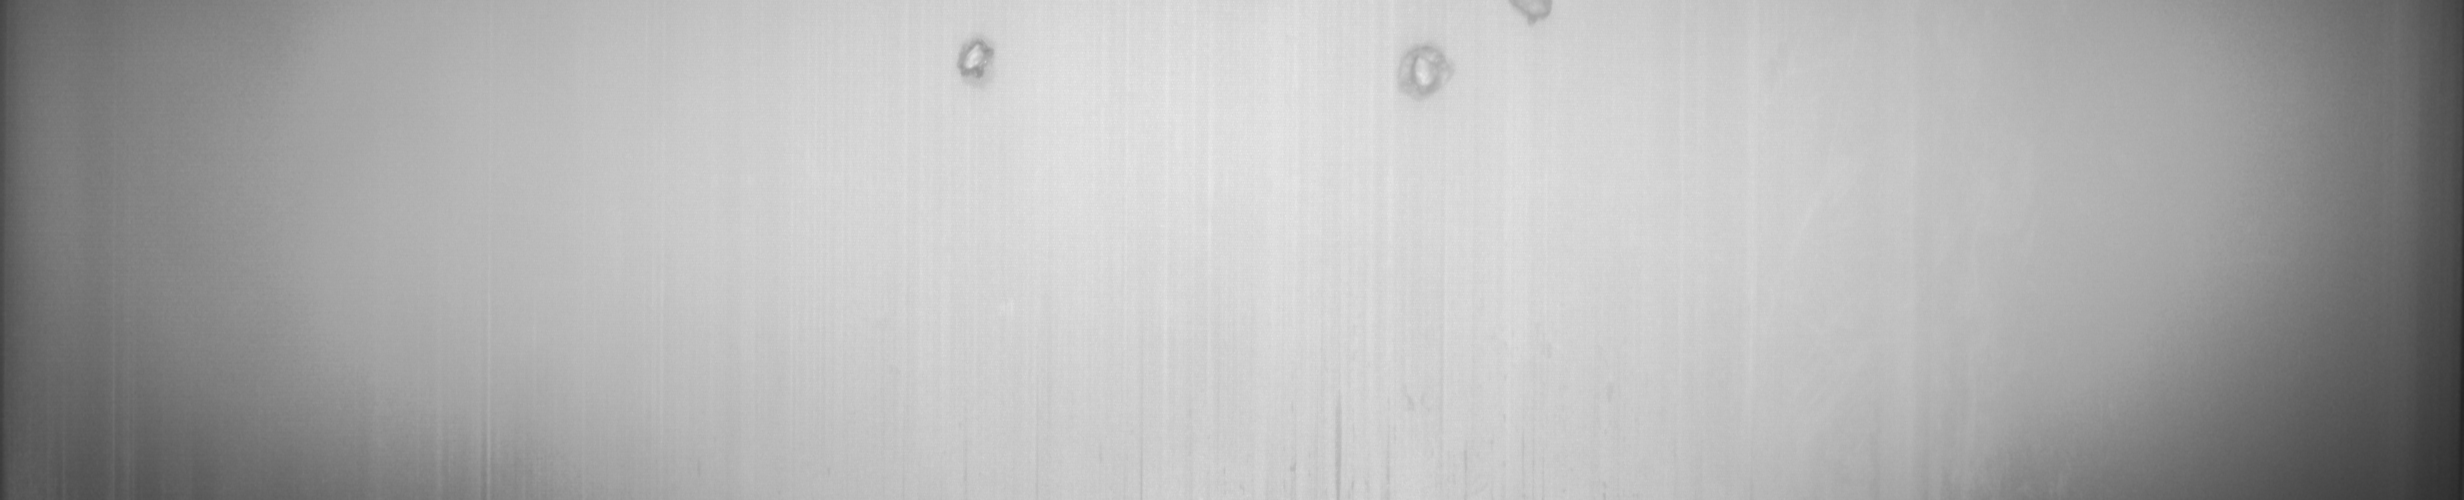

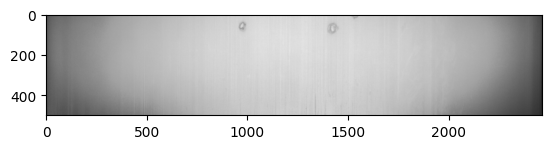

In [ ]:
import matplotlib.pyplot as plt

im, tgt = db[0]

plt.imshow(im.permute(1,2,0))
PIL.Image.fromarray(im.permute(1, 2, 0).mul(255).byte().cpu().numpy())

In [ ]:
print(im.shape)
print(tgt['masks'].shape)

torch.Size([3, 500, 2464])
torch.Size([3, 500, 2464])


In [ ]:
index = 0
for i, t in db:
  if (len(t['masks']) < 2):
    print(len(t['masks']), index)
  index = index + 1

1 16
1 21
1 36
1 40
1 189
1 208
1 403


In [ ]:
index = 0
for i, t in db:
  al = len(t['area'])
  ml = len(t['boxes'])
  bl = len(t['masks'])
  ll = len(t['labels'])

  if (al == ml and al == bl and al == ll ):
    pass
  else :
    print(index, al, ml, bl, ll)

  # if (al < 5):
  #   print(index, al)

  index = index + 1


In [ ]:
db[3]

(tensor([[[0.2196, 0.2392, 0.2588,  ..., 0.2902, 0.2863, 0.2824],
          [0.2196, 0.2392, 0.2549,  ..., 0.2902, 0.2824, 0.2824],
          [0.2235, 0.2392, 0.2588,  ..., 0.2863, 0.2824, 0.2863],
          ...,
          [0.1882, 0.1765, 0.1608,  ..., 0.3098, 0.3020, 0.3020],
          [0.1882, 0.1804, 0.1647,  ..., 0.3137, 0.2980, 0.2941],
          [0.1922, 0.1804, 0.1647,  ..., 0.3176, 0.2980, 0.2941]],
 
         [[0.2196, 0.2392, 0.2588,  ..., 0.2902, 0.2863, 0.2824],
          [0.2196, 0.2392, 0.2549,  ..., 0.2902, 0.2824, 0.2824],
          [0.2235, 0.2392, 0.2588,  ..., 0.2863, 0.2824, 0.2863],
          ...,
          [0.1882, 0.1765, 0.1608,  ..., 0.3098, 0.3020, 0.3020],
          [0.1882, 0.1804, 0.1647,  ..., 0.3137, 0.2980, 0.2941],
          [0.1922, 0.1804, 0.1647,  ..., 0.3176, 0.2980, 0.2941]],
 
         [[0.2196, 0.2392, 0.2588,  ..., 0.2902, 0.2863, 0.2824],
          [0.2196, 0.2392, 0.2549,  ..., 0.2902, 0.2824, 0.2824],
          [0.2235, 0.2392, 0.2588,  ...,

change failimport with _six to 'from torch import inf'

In [ ]:
#print(model.backbone.body.layer1[0].conv1.weight.dtype)

In [ ]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
# git checkout v0.8.2

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

fatal: destination path 'vision' already exists and is not an empty directory.


In [ ]:

from engine import train_one_epoch, evaluate
import utils
# import torchvision.transforms as T

# #print(T.RandomVerticalFlip)

# def get_transform(train):
#     transforms = []

#     def crop800(image):
#       return T.functional(image, 28, 160, 2416, 494)

#     # converts the image, a PIL image, into a PyTorch Tensor
#     transforms.append(T.ToTensor())
#     #transforms.append(transforms.Lambda(crop800),)
#     #if train:
#         # during training, randomly flip the training images
#         # and ground-truth for data augmentation
#         # transforms.append(T.RandomHorizontalFlip(0.5))
#         # transforms.append(T.RandomVerticalFlip(p=0.5))
#         # transforms.append(T.RandomPerspective(distortion_scale=0.6, p=1.0))
#     return T.Compose(transforms)

# trans_global = get_transform(train=True)

In [ ]:
from torchvision.models.detection.anchor_utils import AnchorGenerator

def get_instance_segmentation_model(num_classes):
        cherry_anchor_sizes = ((8,), (16,), (32,), (64,) )
        cherry_apect_ratios = ((0.666, 1.0, 1.333),) * len(cherry_anchor_sizes)
        cherry_rpn = AnchorGenerator(cherry_anchor_sizes, cherry_apect_ratios)

    # load an instance segmentation model pre-trained on COCO
        model = torchvision.models.detection.maskrcnn_resnet50_fpn(

            pretrained=False,
            num_classes=2,

            # base class MaskR-CNN parameters
            # transform parameters
            min_size=250,
            max_size=1232,
            image_mean=None,
            image_std=None,
            # RPN parameters
            rpn_anchor_generator=None,
            rpn_head=None,
            rpn_pre_nms_top_n_train=20000,
            rpn_pre_nms_top_n_test=10000,
            rpn_post_nms_top_n_train=20000,
            rpn_post_nms_top_n_test=10000,
            rpn_nms_thresh=0.7,
            rpn_fg_iou_thresh=0.7,
            rpn_bg_iou_thresh=0.3,
            rpn_batch_size_per_image=2560,
            rpn_positive_fraction=0.5,
            rpn_score_thresh=0.0,
            # Box parametersasd
            box_roi_pool=None,
            box_head=None,
            box_predictor=None,
            box_score_thresh=0.5,
            box_nms_thresh=0.5,
            box_detections_per_img=1000,
            box_fg_iou_thresh=0.5,
            box_bg_iou_thresh=0.5,
            box_batch_size_per_image=5120,
            box_positive_fraction=0.25,
            bbox_reg_weights=None,
            # Mask parameters
            mask_roi_pool=None,
            mask_head=None,
            mask_predictor=None,

        )

        return model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


torch.Size([7, 4])
torch.Size([7, 500, 2464])
torch.Size([7])


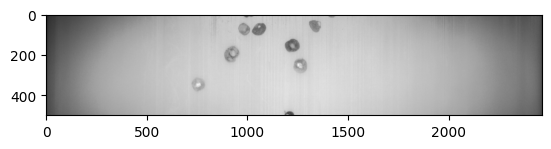

In [ ]:
import torchvision

import matplotlib.pyplot as plt


model = get_instance_segmentation_model(2) #torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
dataset = CherryDataset(data, get_transform(train=False))
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=6, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn
)

images,targets = next(iter(data_loader))

masks = targets[0]['masks']

mask = masks[0]

plt.imshow(  images[0].permute(1,2,0)  )
#plt.imshow(  mask  )


# images_double = list(image.float() for image in images)

# print(images_double[0].dtype)
#images[0].shape

#print(images[0].shape)
#im_torch = torch.tensor(images)

#print(targets)

#targets = [{k: v for k, v in t.items()} for t in targets]
#print(images)
print(targets[0]['boxes'].shape)
print(targets[0]['masks'].shape)
print(targets[0]['labels'].shape)
# print(targets[0]['area'].shape)
output = model(images,targets)   # Returns losses and detections

# For inference
model.eval()
x = [torch.rand(3, 2416, 494), torch.rand(3, 2416, 494)]
predictions = model(x)           # Returns predictions






### Putting everything together

We now have the dataset class, the models and the data transforms. Let's instantiate them

In [ ]:
# perform maximum augmentations and remove any images with no bounding boxes in them

# dataset.tfs = get_transform(train=False)
# ind = []
# for index, data in enumerate(dataset):
#   targets = data[1]
#   boxes = targets['boxes']
#   if len(boxes) == 0:
#     ind.append(index)

# if(len(ind) >0):
#   print('remove: ', ind)
#   del dataset[ind]

# del dataset[[402, 431, 435, 767, 772, 780, 981]]

In [ ]:
# use our dataset and defined transformations
dataset = CherryDataset(data, get_transform(train=True, rotation=[-0,0], rotation_prob=0.5))
#del dataset[[402, 431, 435, 767, 772, 780, 981]]
dataset_test = CherryDataset(data, get_transform(train=False))
#del dataset_test[[402, 431, 435, 767, 772, 780, 981]]

# split the dataset in train and test set
torch.manual_seed(1)


print(len(dataset))
indices = torch.randperm(len(dataset)).tolist()
indices
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

print(indices)
print(len(dataset))
print(len(dataset_test))


# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=2,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=2, shuffle=False, num_workers=2,
    collate_fn=utils.collate_fn)

414
[193, 60, 326, 278, 87, 41, 353, 8, 15, 396, 214, 401, 322, 384, 27, 321, 250, 4, 20, 45, 36, 348, 96, 251, 327, 125, 376, 215, 375, 363, 80, 7, 135, 402, 111, 222, 89, 203, 310, 224, 161, 155, 14, 369, 17, 33, 116, 299, 185, 183, 38, 51, 158, 277, 315, 145, 117, 48, 167, 102, 166, 245, 289, 311, 227, 104, 199, 357, 126, 12, 223, 309, 128, 364, 346, 132, 159, 225, 58, 179, 147, 162, 59, 83, 169, 24, 133, 163, 258, 218, 338, 18, 195, 99, 197, 115, 237, 307, 170, 241, 383, 377, 153, 9, 110, 252, 172, 281, 303, 359, 333, 181, 349, 230, 86, 57, 324, 190, 140, 209, 208, 273, 61, 6, 263, 288, 385, 21, 266, 32, 411, 201, 150, 279, 412, 410, 168, 398, 130, 49, 143, 391, 2, 42, 46, 151, 334, 91, 268, 66, 381, 260, 340, 138, 74, 284, 220, 356, 171, 331, 265, 93, 23, 156, 373, 286, 352, 0, 50, 90, 246, 81, 242, 5, 231, 205, 192, 312, 149, 293, 394, 405, 261, 25, 202, 78, 210, 235, 30, 144, 196, 198, 207, 40, 180, 85, 247, 406, 118, 345, 370, 305, 142, 62, 259, 177, 100, 19, 313, 374, 226, 365

Now let's instantiate the model and the optimizer

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# get the model using our helper function
model = get_instance_segmentation_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

And now let's train the model for 10 epochs, evaluating at the end of every epoch.

In [ ]:
# let's train it for 10 epochs
from torch.optim.lr_scheduler import StepLR
num_epochs = 12

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    #evaluate(model, data_loader_test, device=device)

Epoch: [0]  [  0/182]  eta: 0:03:23  lr: 0.000033  loss: 4.2246 (4.2246)  loss_classifier: 0.7235 (0.7235)  loss_box_reg: 0.0489 (0.0489)  loss_mask: 2.7555 (2.7555)  loss_objectness: 0.6868 (0.6868)  loss_rpn_box_reg: 0.0098 (0.0098)  time: 1.1167  data: 0.7313  max mem: 12608
Epoch: [0]  [ 10/182]  eta: 0:01:07  lr: 0.000309  loss: 2.7166 (2.9479)  loss_classifier: 0.6832 (0.6726)  loss_box_reg: 0.0513 (0.0499)  loss_mask: 1.2311 (1.5269)  loss_objectness: 0.6846 (0.6846)  loss_rpn_box_reg: 0.0102 (0.0139)  time: 0.3897  data: 0.0864  max mem: 12608
Epoch: [0]  [ 20/182]  eta: 0:00:57  lr: 0.000585  loss: 2.1821 (2.4433)  loss_classifier: 0.5519 (0.5451)  loss_box_reg: 0.0568 (0.0622)  loss_mask: 0.8439 (1.1430)  loss_objectness: 0.6805 (0.6786)  loss_rpn_box_reg: 0.0085 (0.0143)  time: 0.3138  data: 0.0212  max mem: 12608
Epoch: [0]  [ 30/182]  eta: 0:00:52  lr: 0.000860  loss: 1.6274 (2.1174)  loss_classifier: 0.2462 (0.4258)  loss_box_reg: 0.0832 (0.0850)  loss_mask: 0.5854 (0.943

KeyboardInterrupt: 

In [ ]:
# 50

from google.colab import drive
drive.mount('/gdrive')

path =  'seg_model_red.pt'

torch.save(model.state_dict(), path)

# # # Create & upload a text file.
# # uploaded = drive.CreateFile({'segmentation_model': path})
# # uploaded.SetContentFile(path)
# # uploaded.Upload()
# # print('Uploaded file with ID {}'.format(uploaded.get('id')))


!cp seg_model_red.pt "/gdrive/My Drive/seg_model_red_v1.pt"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Now that training has finished, let's have a look at what it actually predicts in a test image

In [ ]:
this_len = 100
this_im = None
this_target = None
print(len(dataset_test))
for i in range(0,len(dataset_test)):

  this_im, _ = dataset_test[i]
  boxes = _['boxes']
  print(i, boxes.shape)

  if len(boxes) > 100:
    this_im = im
    this_target = target

50
0 torch.Size([81, 4])
1 torch.Size([16, 4])
2 torch.Size([15, 4])
3 torch.Size([114, 4])
4 torch.Size([8, 4])
5 torch.Size([10, 4])
6 torch.Size([18, 4])
7 torch.Size([31, 4])
8 torch.Size([20, 4])
9 torch.Size([22, 4])
10 torch.Size([21, 4])
11 torch.Size([8, 4])
12 torch.Size([7, 4])
13 torch.Size([23, 4])
14 torch.Size([16, 4])
15 torch.Size([12, 4])
16 torch.Size([23, 4])
17 torch.Size([14, 4])
18 torch.Size([7, 4])
19 torch.Size([7, 4])
20 torch.Size([64, 4])
21 torch.Size([18, 4])
22 torch.Size([6, 4])
23 torch.Size([2, 4])
24 torch.Size([33, 4])
25 torch.Size([40, 4])
26 torch.Size([42, 4])
27 torch.Size([23, 4])
28 torch.Size([23, 4])
29 torch.Size([12, 4])
30 torch.Size([28, 4])
31 torch.Size([57, 4])
32 torch.Size([10, 4])
33 torch.Size([55, 4])
34 torch.Size([26, 4])
35 torch.Size([17, 4])
36 torch.Size([3, 4])
37 torch.Size([52, 4])
38 torch.Size([15, 4])
39 torch.Size([17, 4])
40 torch.Size([54, 4])
41 torch.Size([7, 4])
42 torch.Size([7, 4])
43 torch.Size([8, 4])
44 to

In [ ]:
# # pick one image from the test set
# this_im, _ = dataset_test[3]

im_pil = PIL.Image.open('/gdrive/MyDrive/traina/hdr/images/natural_pits/10439811/10439811_top_2.bmp', )
im_pil = im_pil.convert('RGB')
this_im = torchvision.transforms.functional.to_tensor(im_pil)
print(this_im.shape)
#this_im = this_im.permute(1,2,0)
#this_im.unsqueeze_(0)


# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([this_im.to(device)])

torch.Size([3, 500, 2464])


Printing the prediction shows that we have a list of dictionaries. Each element of the list corresponds to a different image. As we have a single image, there is a single dictionary in the list.
The dictionary contains the predictions for the image we passed. In this case, we can see that it contains `boxes`, `labels`, `masks` and `scores` as fields.

In [ ]:
print(len(prediction[0]['boxes']))

prediction

13


[{'boxes': tensor([[ 904.8549,  133.8728,  962.3622,  186.7838],
          [ 706.4633,  152.9512,  761.8010,  210.3204],
          [ 749.9796,   24.6106,  802.8026,   69.7355],
          [ 407.7530,  402.0831,  465.5514,  455.6634],
          [2264.9250,   69.7183, 2320.9480,  123.7069],
          [ 804.8034,  360.0758,  850.5617,  412.8877],
          [ 156.3405,  147.5646,  210.0393,  209.6160],
          [2274.9434,  428.2762, 2316.0625,  486.1661],
          [2274.0503,  277.8922, 2319.6821,  320.9279],
          [ 884.6618,   78.7454,  920.4356,  115.3288],
          [1762.5232,  109.2290, 1809.5745,  148.1091],
          [ 173.6129,  274.6190,  213.2223,  316.7601],
          [ 679.9178,  135.3984,  711.6977,  165.9538]], device='cuda:0'),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'),
  'scores': tensor([0.9995, 0.9993, 0.9993, 0.9991, 0.9990, 0.9989, 0.9977, 0.9976, 0.9965,
          0.9962, 0.9958, 0.9951, 0.9595], device='cuda:0'),
  'masks': te

Let's inspect the image and the predicted segmentation masks.

For that, we need to convert the image, which has been rescaled to 0-1 and had the channels flipped so that we have it in `[C, H, W]` format.

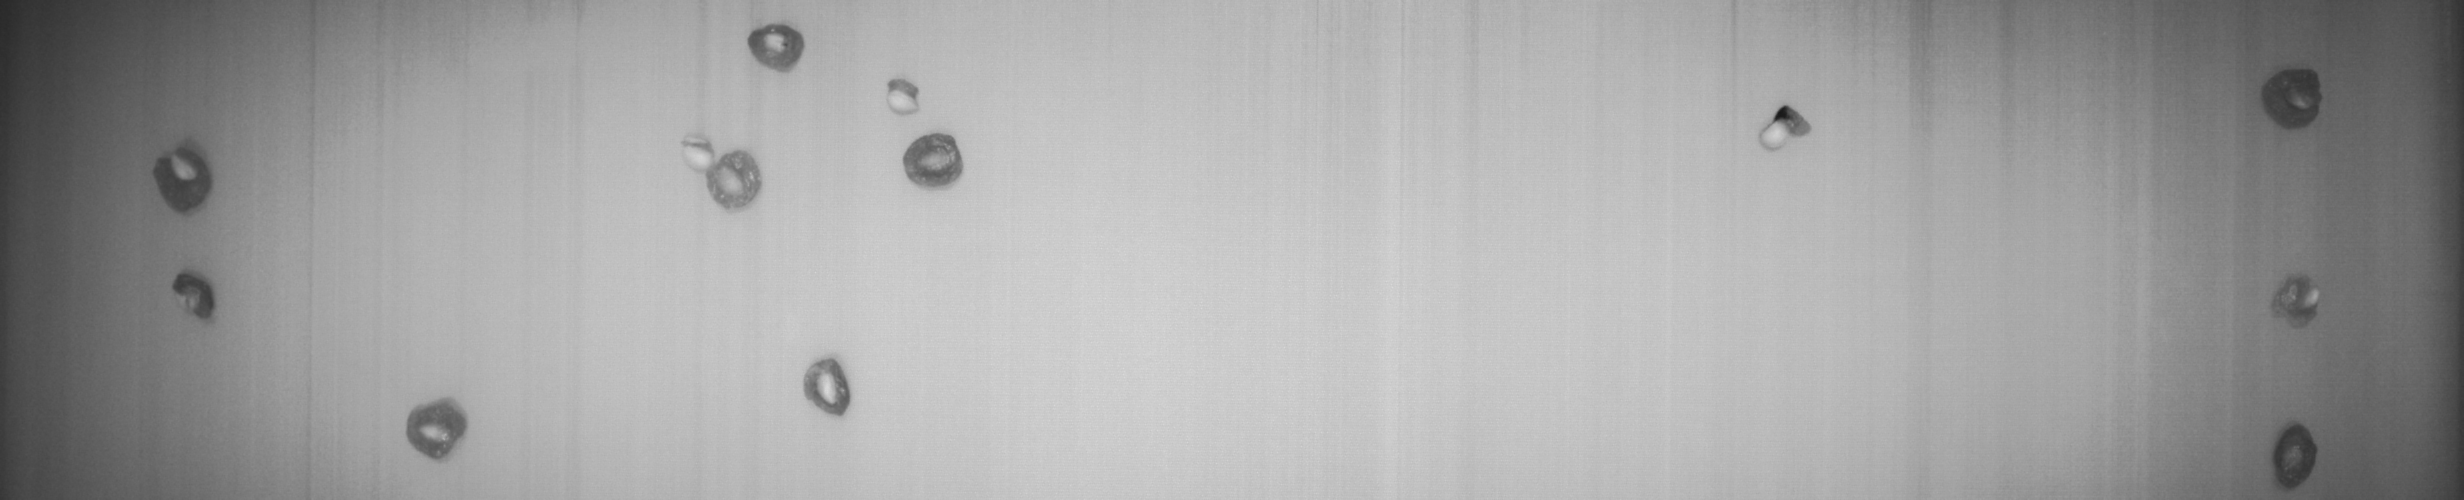

In [ ]:

PIL.Image.fromarray(this_im.mul(255).permute(1, 2, 0).byte().numpy())

And let's now visualize the top predicted segmentation mask. The masks are predicted as `[N, 1, H, W]`, where `N` is the number of predictions, and are probability maps between 0-1.

In [ ]:
import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    return img



In [ ]:
from torchvision.utils import draw_segmentation_masks

scores = prediction[0]['scores'].ge(0.8)
masks = prediction[0]['masks'].ge(0.25)

masks_ge050 = masks[scores]

int8_img = (this_im *255).byte()

cherries_with_all_masks = draw_segmentation_masks(int8_img, masks=masks_ge050.squeeze(), alpha=.5)

img_color_masks = show(cherries_with_all_masks)

img_color_masks

NameError: name 'prediction' is not defined

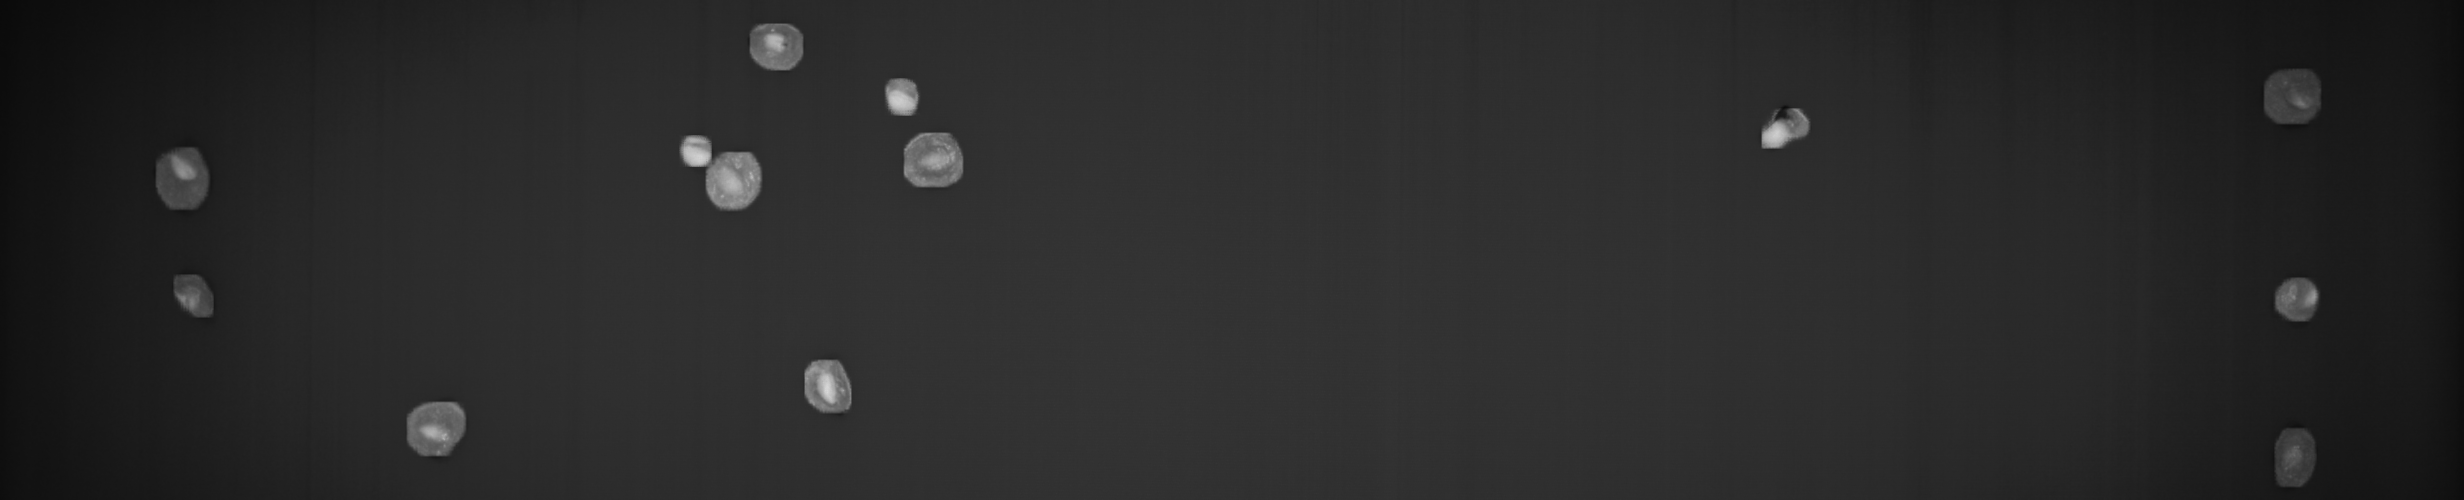

In [ ]:

im_all = torch.zeros(3,500,2464) + 0.25

for i in range(len(prediction[0]['masks'])):
  if (prediction[0]['scores'][i] > 0.5):
    im_all = im_all + prediction[0]['masks'][i].to('cpu') * 0.75


masked = this_im.to('cpu') * im_all

PIL.Image.fromarray(masked.permute(1, 2, 0).mul(255).byte().cpu().numpy())

In [ ]:
! cp -r /gdrive/MyDrive/traina/hdr/images hdr

^C


In [ ]:
from os import listdir
from os.path import isdir, join

def process_image_set(mypath):
  onlydirs = [f for f in listdir(mypath) if isdir(join(mypath, f))]
  print(onlydirs)


process_image_set('hdr/natural_clean')

FileNotFoundError: [Errno 2] No such file or directory: 'hdr/natural_clean'